# Curve Fitting 
Author: Zhengyang Gong
## Introduction
This file is to fit the curve and conduct gradient descent to turn a polynomial to fit in what we want. 
And the function being investiaged on is $$y(x)=∑_iθ_ix^i$$.


In [1]:
#import libraries
%matplotlib notebook

import numpy as np 
import matplotlib.pyplot as plt

## Define function of polynomial model with noise and plot the graph of the data 

In [2]:
def polyModelWithNoise(x,theta,sigma):
    '''
    Input: 
    x: an array of x values 
    theta: the theta parameters of the polynomial
    sigma: the standard deviation of the noise
    Output: 
    y(x) as shown above, which is the product of theta with orders of x, and noise is added(with normal distribution) 
    '''
    summation=np.array([]) # the suammtion of each parameters 
    y=np.array([])
    for i in range(len(x)):
        noise= np.random.normal(0,sigma) # noise choose here is normal distribution with sigma
        summation=0
        for j in range(len(theta)):
            summation=np.append(summation,theta[j]*(x[i]**(j+1)))
        y=np.append(y,np.sum(summation)+noise)
    return y 

<IPython.core.display.Javascript object>


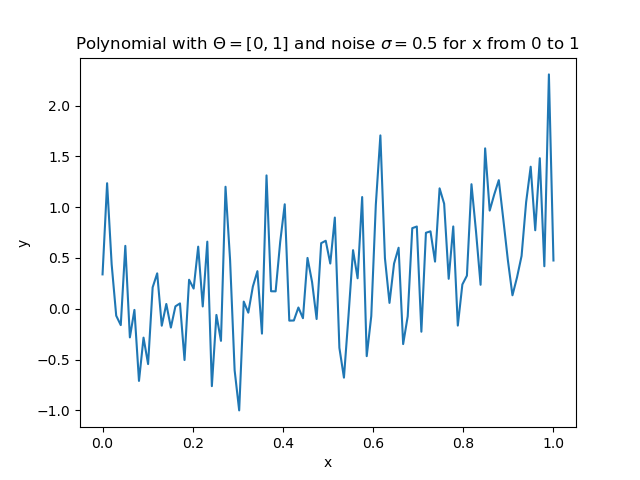

Text(0.5, 1.0, 'Polynomial with ${\\Theta}=[0,1]$ and noise ${\\sigma}=0.5$ for x from 0 to 1 ')

In [3]:
# Set the initial parameters 
sigma=0.5
theta = np.array([0,1])
x=np.linspace(0,1,100)
#Plot the graph of y(x) against x 
plt.plot(x,polyModelWithNoise(x,theta,sigma))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial with ${\Theta}=[0,1]$ and noise ${\sigma}=0.5$ for x from 0 to 1 ')

## Define the function of gradient with respect to parameter ${\theta}$

In [4]:
def polyGradient(x,theta):
    '''
    Input: 
    x: an array of x values 
    theta: the theta parameters of the polynomial
    Output:
    a 2-d array of the gradient of the polynomial
    '''
    terms = np.array([])
    y = np.array([])
    for i in range(len(theta)):
        Record = theta[i]  # Record the theta parameter 
        theta[i] = 1 # In order to calculate the differentiation with respect to theta, theta is set to be 1 
        for j in range(len(x)):
            terms = 0
            for l in range(len(theta)):
                terms = np.append(terms,theta[l]*(x[j]**(l+1)))
            y = np.append(y,np.sum(terms))
        theta[i] = Record # Set the theta parameter to its originial value for next loop calculation 
  
    return y.reshape(len(theta),len(x))# reshape for the calculation of in the next cell 


## Fit in the Curve with ${\theta}= [0,1]$ and noise ${\sigma}= 0.5$ to ${\theta}= [-1,0.5]$ and noise ${\sigma}=0$

In [5]:
thetatrue=np.array([-1,0.5]) # the wanted theta values 
theta=np.array([0,1])# the original theta values
x=np.random.random_sample(10) # random choose 10 points from 0 to 1 as x values
sigma=0.5
def truepoly(x):
    '''
    Input: an array of x values
    Output: y(x) as shown above, which is the product of theta with orders of x. with theta equals wanted value and 0 noise  
    '''
    return polyModelWithNoise(x,thetatrue,0)

Model_1=polyModelWithNoise(x,theta,sigma)
Model_2=truepoly(x)
# define the steps and learning rate 
step=100
learning_rate=0.5
deviationArray = np.array([])
for i in range(step):
    deviation=polyModelWithNoise(x,theta,sigma)-truepoly(x) # the difference to the wanted functions 
    deviationArray = np.append(deviationArray, np.average(deviation**2))
    theta=theta - learning_rate*np.average(deviation[None,:]*polyGradient(x,theta),axis = 1)

print('the fit theta parameters are',theta)
    


the fit theta parameters are [-0.76819169  0.48199686]


## ## Fit in the Curve with ${\theta}= [0,1,1,2]$ and noise ${\sigma}= 0.5$ to ${\theta}= [1]$ and noise ${\sigma}=0$, which is the first order polynomial 

In [6]:
thetatrue=np.array([1]) # the wanted theta values 
theta=np.array([0,1,1,2])# the original theta values
x=np.random.random_sample(10) # random choose 10 points from 0 to 1 as x values
sigma=0.5
def truepoly(x):
    '''
    Input: an array of x values
    Output: y(x) as shown above, which is the product of theta with orders of x. with theta equals wanted value and 0 noise  
    '''
    return polyModelWithNoise(x,thetatrue,0)

Model_1=polyModelWithNoise(x,theta,sigma)
Model_2=truepoly(x)
# define the steps and learning rate 
step=100
learning_rate=0.5
deviationArray = np.array([])
for i in range(step):
    deviation=polyModelWithNoise(x,theta,sigma)-truepoly(x) # the difference to the wanted functions 
    deviationArray = np.append(deviationArray, np.average(deviation**2))
    theta=theta - learning_rate*np.average(deviation[None,:]*polyGradient(x,theta),axis = 1)

print('the fit theta parameters are',theta)
    

the fit theta parameters are [ 0.53861741  0.14113029 -0.47459023  0.70159187]


## ## Fit in the Curve with ${\theta}= [0,1,1,2]$ and noise ${\sigma}= 0.5$ to ${\theta}= [1,-1,1]$ and noise ${\sigma}=0$, which is the third order polynomial 

In [7]:
thetatrue=np.array([1,-1,1]) # the wanted theta values 
theta=np.array([0,1,1,2])# the original theta values
x=np.random.random_sample(10) # random choose 10 points from 0 to 1 as x values
sigma=0.5
def truepoly(x):
    '''
    Input: an array of x values
    Output: y(x) as shown above, which is the product of theta with orders of x. with theta equals wanted value and 0 noise  
    '''
    return polyModelWithNoise(x,thetatrue,0)

Model_1=polyModelWithNoise(x,theta,sigma)
Model_2=truepoly(x)
# define the steps and learning rate 
step=100
learning_rate=0.5
deviationArray = np.array([])
for i in range(step):
    deviation=polyModelWithNoise(x,theta,sigma)-truepoly(x) # the difference to the wanted functions 
    deviationArray = np.append(deviationArray, np.average(deviation**2))
    theta=theta - learning_rate*np.average(deviation[None,:]*polyGradient(x,theta),axis = 1)

print('the fit theta parameters are',theta)
    

the fit theta parameters are [ 0.53275717  0.21791181 -0.24320842  0.35674296]


## ## Fit in the Curve with ${\theta}= [0,1,1,2]$ and noise ${\sigma}= 0.5$ to ${\theta}= [1,1,1,-1,1,-1,1]$ and noise ${\sigma}=0$, which is the seventh order polynomial 

In [8]:
thetatrue=np.array([1,1,1,-1,1,-1,1]) # the wanted theta values 
theta=np.array([0,1,1,2])# the original theta values
x=np.random.random_sample(10) # random choose 10 points from 0 to 1 as x values
sigma=0.5
def truepoly(x):
    '''
    Input: an array of x values
    Output: y(x) as shown above, which is the product of theta with orders of x. with theta equals wanted value and 0 noise  
    '''
    return polyModelWithNoise(x,thetatrue,0)

Model_1=polyModelWithNoise(x,theta,sigma)
Model_2=truepoly(x)
# define the steps and learning rate 
step=100
learning_rate=0.5
deviationArray = np.array([])
for i in range(step):
    deviation=polyModelWithNoise(x,theta,sigma)-truepoly(x) # the difference to the wanted functions 
    deviationArray = np.append(deviationArray, np.average(deviation**2))
    theta=theta - learning_rate*np.average(deviation[None,:]*polyGradient(x,theta),axis = 1)

print('the fit theta parameters are',theta)


the fit theta parameters are [0.59336597 0.74767263 0.66885257 1.85911116]


## ## Fit in the Curve with ${\theta}= [0,1,1,2]$ and noise ${\sigma}= 0.5$ to ${\theta}= [1,1,1]$ and noise ${\sigma}=0$, which is the third order polynomial and plot the graph

the fit theta parameters are [0.90332978 0.76912258 0.52496794 1.25737595]


<IPython.core.display.Javascript object>


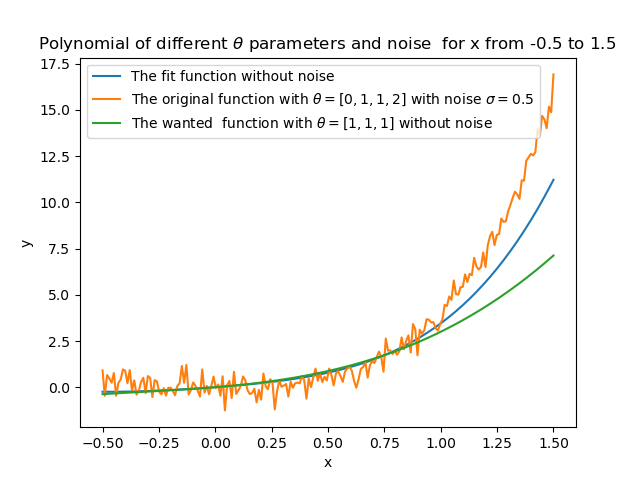

Text(0.5, 1.0, 'Polynomial of different $\\theta$ parameters and noise  for x from -0.5 to 1.5 ')

In [9]:
thetatrue=np.array([1,1,1]) # the wanted theta values 
theta=np.array([0,1,1,2])# the original theta values
x=np.random.random_sample(10) # random choose 10 points from 0 to 1 as x values
sigma=0.5
def truepoly(x):
    '''
    Input: an array of x values
    Output: y(x) as shown above, which is the product of theta with orders of x. with theta equals wanted value and 0 noise  
    '''
    return polyModelWithNoise(x,thetatrue,0)

Model_1=polyModelWithNoise(x,theta,sigma)
Model_2=truepoly(x)
# define the steps and learning rate 
step=100
learning_rate=0.5
deviationArray = np.array([])
for i in range(step):
    deviation=polyModelWithNoise(x,theta,sigma)-truepoly(x) # the difference to the wanted functions 
    deviationArray = np.append(deviationArray, np.average(deviation**2))
    theta=theta - learning_rate*np.average(deviation[None,:]*polyGradient(x,theta),axis = 1)

print('the fit theta parameters are',theta)


x=np.linspace(-0.5,1.5,200)
plt.figure()
plt.plot(x,polyModelWithNoise(x,theta,0),label='The fit function without noise')
plt.plot(x,polyModelWithNoise(x,[0,1,1,2],0.5),label='The original function with $\\theta=[0,1,1,2]$ with noise $\\sigma=0.5$')

plt.plot(x,polyModelWithNoise(x,[1,1,1],0),label='The wanted  function with $\\theta=[1,1,1]$ without noise')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial of different $\\theta$ parameters and noise  for x from -0.5 to 1.5 ')
    

As the graphs shown, in the segment from 0 to 1, the three lines are very close to each other, suggesting it's an approporiate simulation of the function. However, at x bigger than 1.5, they begin to diverge; the fitting curve is in between the wanted function and the original function, suggesting that the simulation of the fitting curve is only application within the trained area. 